### Libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

### Synthetic data example

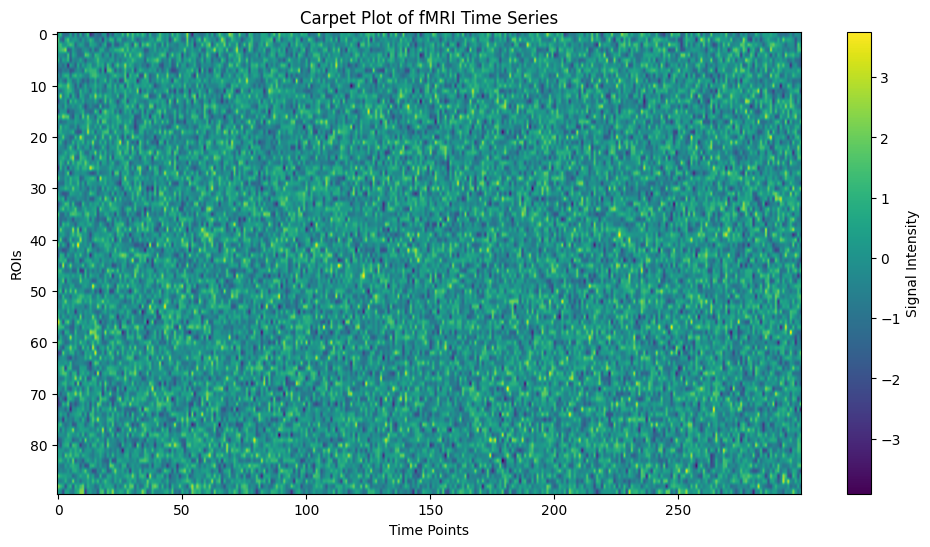

In [4]:
# Example: Assuming `time_series` is a numpy array of shape (n_rois, n_timepoints)
# For demonstration, let's create a synthetic dataset:
n_rois, n_timepoints = 90, 300  # Adjust these as needed
time_series = np.random.randn(n_rois, n_timepoints)

# Create the carpet plot
plt.figure(figsize=(12, 6))
plt.imshow(time_series, aspect='auto', cmap='viridis')
plt.colorbar(label='Signal Intensity')
plt.xlabel('Time Points')
plt.ylabel('ROIs')
plt.title('Carpet Plot of fMRI Time Series')
plt.show()

### Check all carpet plots

In [6]:
# Define the directory containing subject subfolders
data_dir = '/pscratch/sd/p/pakmasha/MBBN_data'

# Define an output directory to store the carpet plot images
output_dir = 'carpet_plots'
os.makedirs(output_dir, exist_ok=True)

# List all items in the data directory that are directories (each representing a subject)
subject_folders = [folder for folder in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, folder))]

print(f"Found {len(subject_folders)} subject folders.")

# Iterate over each subject folder
for subject in subject_folders:
    # Construct the expected file path for the time-series file
    # The file is assumed to be named as "<subject_id>.npy" inside its folder.
    subject_file = os.path.join(data_dir, subject, f"{subject}.npy")
    
    # Check if the expected file exists; if not, skip this subject
    if not os.path.exists(subject_file):
        print(f"File not found for subject {subject}: {subject_file}. Skipping...")
        continue

    try:
        # Load the time-series data (expected shape: [n_ROIs, n_timepoints])
        data = np.load(subject_file)
    except Exception as e:
        print(f"Error loading file for subject {subject}: {e}")
        continue

    # Create a carpet plot: rows correspond to ROIs and columns to time points
    plt.figure(figsize=(12, 6))
    plt.imshow(data, aspect='auto', cmap='viridis')
    plt.colorbar(label='Signal Intensity')
    plt.xlabel('Time Points')
    plt.ylabel('ROIs')
    plt.title(f'Carpet Plot for Subject {subject}')

    # Save the plot as an image file in the output directory
    output_file = os.path.join(output_dir, f"{subject}_carpet.png")
    plt.savefig(output_file)
    plt.close()  # Close the plot to free up memory

    print(f"Saved carpet plot for subject {subject} to {output_file}")


Found 2094 subject folders.
Saved carpet plot for subject Barcelona-HCPB_sub-008 to carpet_plots/Barcelona-HCPB_sub-008_carpet.png
Saved carpet plot for subject Brazil_sub-C002061 to carpet_plots/Brazil_sub-C002061_carpet.png
Saved carpet plot for subject Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb3225 to carpet_plots/Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb3225_carpet.png
Saved carpet plot for subject Seoul-SNU_sub-NOR117CSJ to carpet_plots/Seoul-SNU_sub-NOR117CSJ_carpet.png
Saved carpet plot for subject Dresden_sub-GEROME3073 to carpet_plots/Dresden_sub-GEROME3073_carpet.png
Saved carpet plot for subject Bergen_sub-00059 to carpet_plots/Bergen_sub-00059_carpet.png
Saved carpet plot for subject Bangalore-NIMHANS_sub-C0181 to carpet_plots/Bangalore-NIMHANS_sub-C0181_carpet.png
Saved carpet plot for subject Bangalore-NIMHANS_sub-C0128 to carpet_plots/Bangalore-NIMHANS_sub-C0128_carpet.png
Saved carpet plot for subject Seoul-SNU_sub-DNO23LSM to carpet_plots/Seoul-SNU_sub-DNO23LSM_

In [7]:
import os
from PIL import Image
import math

# Directory containing carpet plots
input_dir = '/pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots'
# Create an output directory for montages
output_dir = os.path.join(input_dir, 'montages')
os.makedirs(output_dir, exist_ok=True)

# Get a sorted list of PNG files
files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.png')])

# Define batch parameters
batch_size = 100  # Number of images per montage
cols = 5  # Number of columns in each montage

for batch_start in range(0, len(files), batch_size):
    batch_files = files[batch_start:batch_start + batch_size]
    # Open images in the current batch
    images = [Image.open(f) for f in batch_files]
    img_width, img_height = images[0].size

    # Determine number of rows required
    rows = math.ceil(len(images) / cols)
    
    # Create a new blank image for the montage
    montage_width = cols * img_width
    montage_height = rows * img_height
    montage = Image.new(mode='RGB', size=(montage_width, montage_height), color=(255, 255, 255))

    # Paste each image into the montage
    for idx, img in enumerate(images):
        x = (idx % cols) * img_width
        y = (idx // cols) * img_height
        montage.paste(img, (x, y))
    
    montage_filename = os.path.join(output_dir, f"montage_batch_{batch_start // batch_size + 1}.png")
    montage.save(montage_filename)
    print(f"Saved montage: {montage_filename}")


Saved montage: /pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots/montages/montage_batch_1.png
Saved montage: /pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots/montages/montage_batch_2.png
Saved montage: /pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots/montages/montage_batch_3.png
Saved montage: /pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots/montages/montage_batch_4.png
Saved montage: /pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots/montages/montage_batch_5.png
Saved montage: /pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots/montages/montage_batch_6.png
Saved montage: /pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/carpet_plots/montages/montage_batch_7.png
Saved montage: /pscratch/sd

### Check data distribution

In [19]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from statsmodels.robust.scale import mad  # for robust variability measure

# Define the base directory containing subject subfolders
data_dir = '/pscratch/sd/p/pakmasha/MBBN_data'

# List all subject folders (each folder should be named with the subject ID)
subject_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
print(f"Found {len(subject_folders)} subject folders.")

# Initialize a list to store quality metrics for each subject
quality_metrics = []

for subject in subject_folders:
    file_path = os.path.join(data_dir, subject, f"{subject}.npy")
    if not os.path.exists(file_path):
        print(f"File not found for subject {subject}. Skipping...")
        continue
    try:
        # Load the time-series data (shape: n_timepoints x n_ROIs)
        data = np.load(file_path)
    except Exception as e:
        print(f"Error loading {subject}: {e}")
        continue
    
    # Since data shape is (# timepoints, # ROIs), compute statistics along axis=0 (i.e., for each ROI)
    roi_means = np.mean(data, axis=0)
    roi_medians = np.median(data, axis=0)
    roi_std = np.std(data, axis=0)
    roi_mad = np.array([mad(data[:, i]) for i in range(data.shape[1])])
    roi_skew = skew(data, axis=0)
    roi_kurt = kurtosis(data, axis=0)
    
    # Aggregate metrics across ROIs to form a single measure per subject
    subject_metrics = {
        "subject": subject,
        "mean_of_means": np.mean(roi_means),
        "std_of_means": np.std(roi_means),
        "mean_std": np.mean(roi_std),
        "std_std": np.std(roi_std),
        "mean_mad": np.mean(roi_mad),
        "mean_skew": np.mean(roi_skew),
        "std_skew": np.std(roi_skew),
        "mean_kurt": np.mean(roi_kurt),
        "std_kurt": np.std(roi_kurt)
    }
    
    quality_metrics.append(subject_metrics)

# Create a DataFrame with the computed metrics
df_metrics = pd.DataFrame(quality_metrics)
print(df_metrics.head())

# Compute z-scores for each metric to flag outliers
for col in df_metrics.columns[1:]:
    df_metrics[f'z_{col}'] = (df_metrics[col] - df_metrics[col].mean()) / df_metrics[col].std()

# Example: flag subjects with a z-score > 3 for the 'mean_std' metric
outliers = df_metrics[abs(df_metrics['z_mean_std']) > 3]
print("Subjects flagged as outliers based on 'mean_std':")
print(outliers[['subject', 'mean_std', 'z_mean_std']])

# Save the summary metrics for further inspection
output_csv = '/pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/subject_quality_metrics.csv'
df_metrics.to_csv(output_csv, index=False)
print(f"Quality metrics saved to {output_csv}")

Found 2094 subject folders.


                                             subject  mean_of_means  \
0                             Barcelona-HCPB_sub-008   11983.616066   
1                                 Brazil_sub-C002061   11241.573478   
2  Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb3225   11078.365460   
3                            Seoul-SNU_sub-NOR117CSJ   11974.122946   
4                             Dresden_sub-GEROME3073   11870.812385   

   std_of_means   mean_std    std_std   mean_mad  mean_skew  std_skew  \
0   1088.005877  59.157910  14.511739  59.266887   0.046647  0.159916   
1   1336.312992  32.211973  10.501402  31.716906   0.102599  0.291236   
2    975.715239  51.393654  14.790296  51.197460  -0.002924  0.183799   
3   1219.105577  55.046385  21.325122  54.608221  -0.046272  0.241609   
4   3119.031697  64.957545  23.698905  60.714137  -0.124671  0.428650   

   mean_kurt  std_kurt  
0  -0.005891  0.338089  
1   0.119778  0.624791  
2   0.040826  0.414653  
3  -0.012185  0.452491  
4   1.289

### Inspect outliers

In [15]:
outliers['subject']

1091                      Bangalore-NIMHANS_sub-C0106
1602    Braga-UMinho-Braga-3T_sub-MRI201909303BART036
2038                      Bangalore-NIMHANS_sub-C0021
Name: subject, dtype: object

Chiba-CHB_sub-MADHC010 data shape: (196, 316)


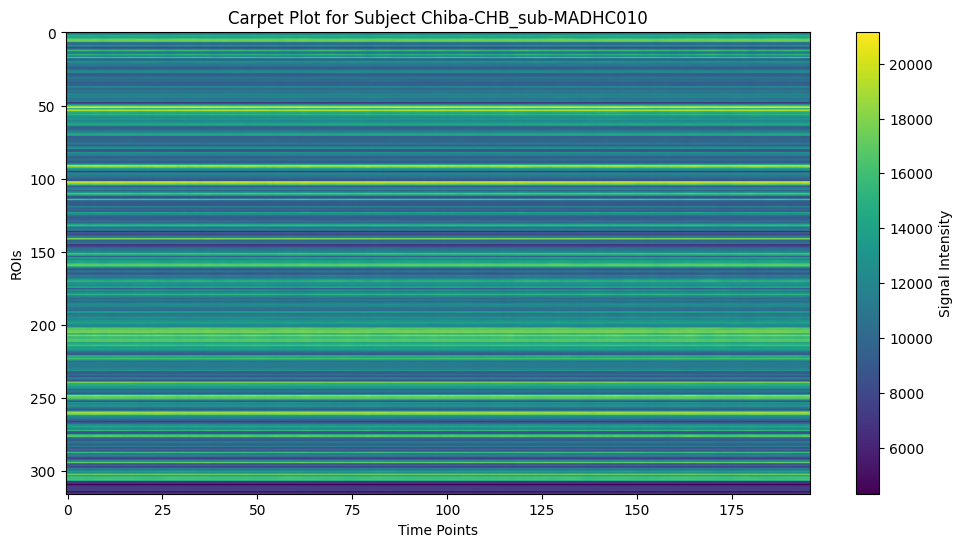

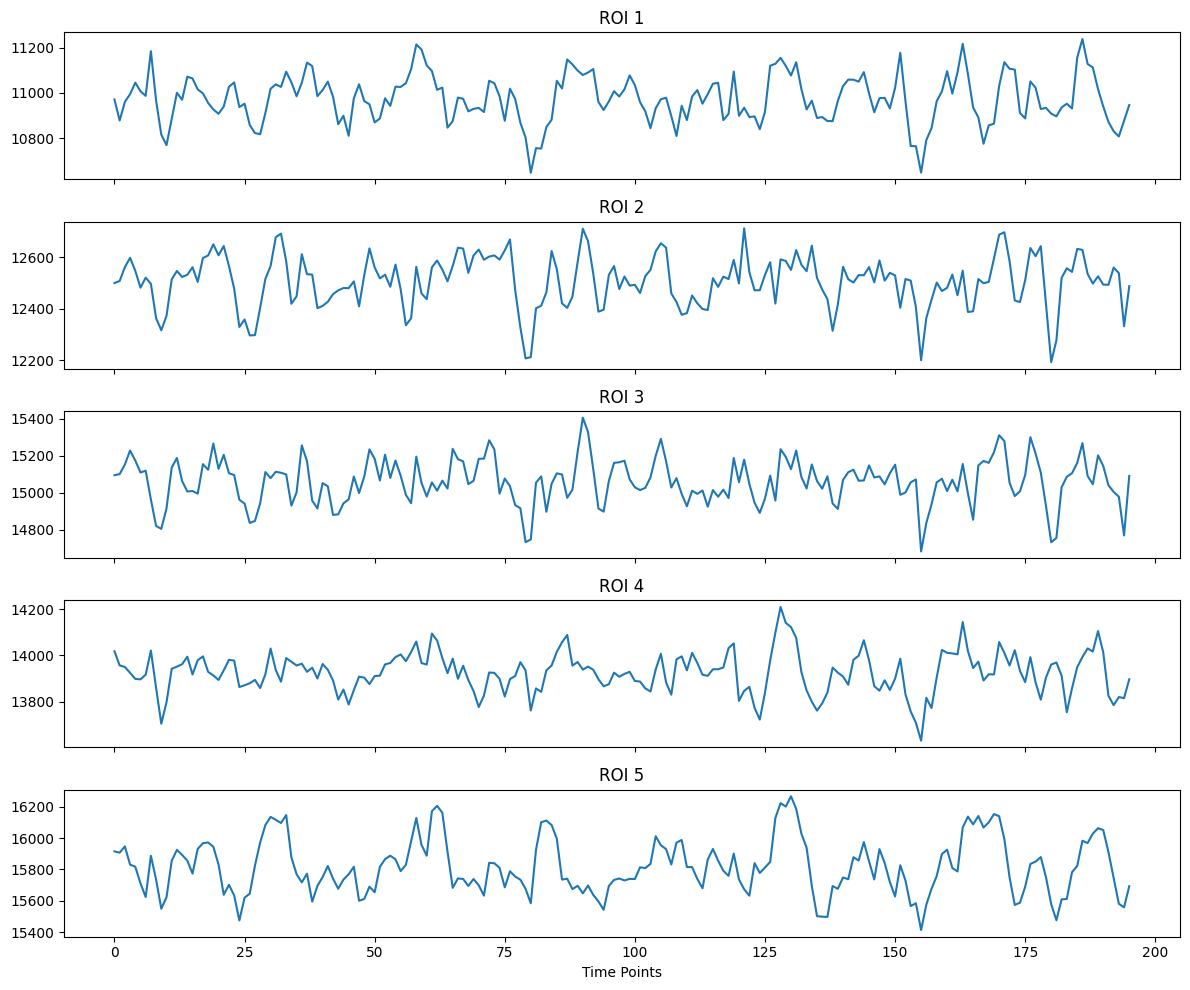

Bangalore-NIMHANS_sub-C0198 data shape: (303, 316)


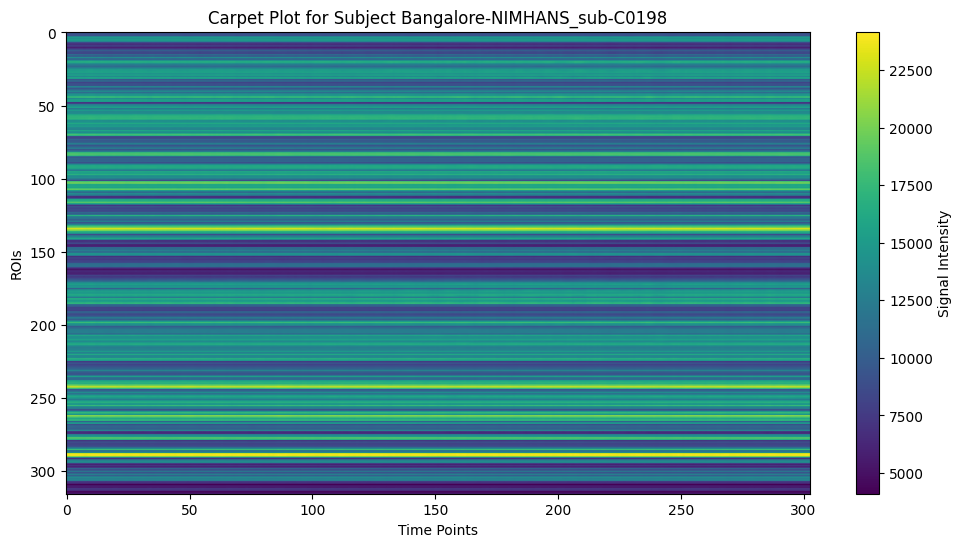

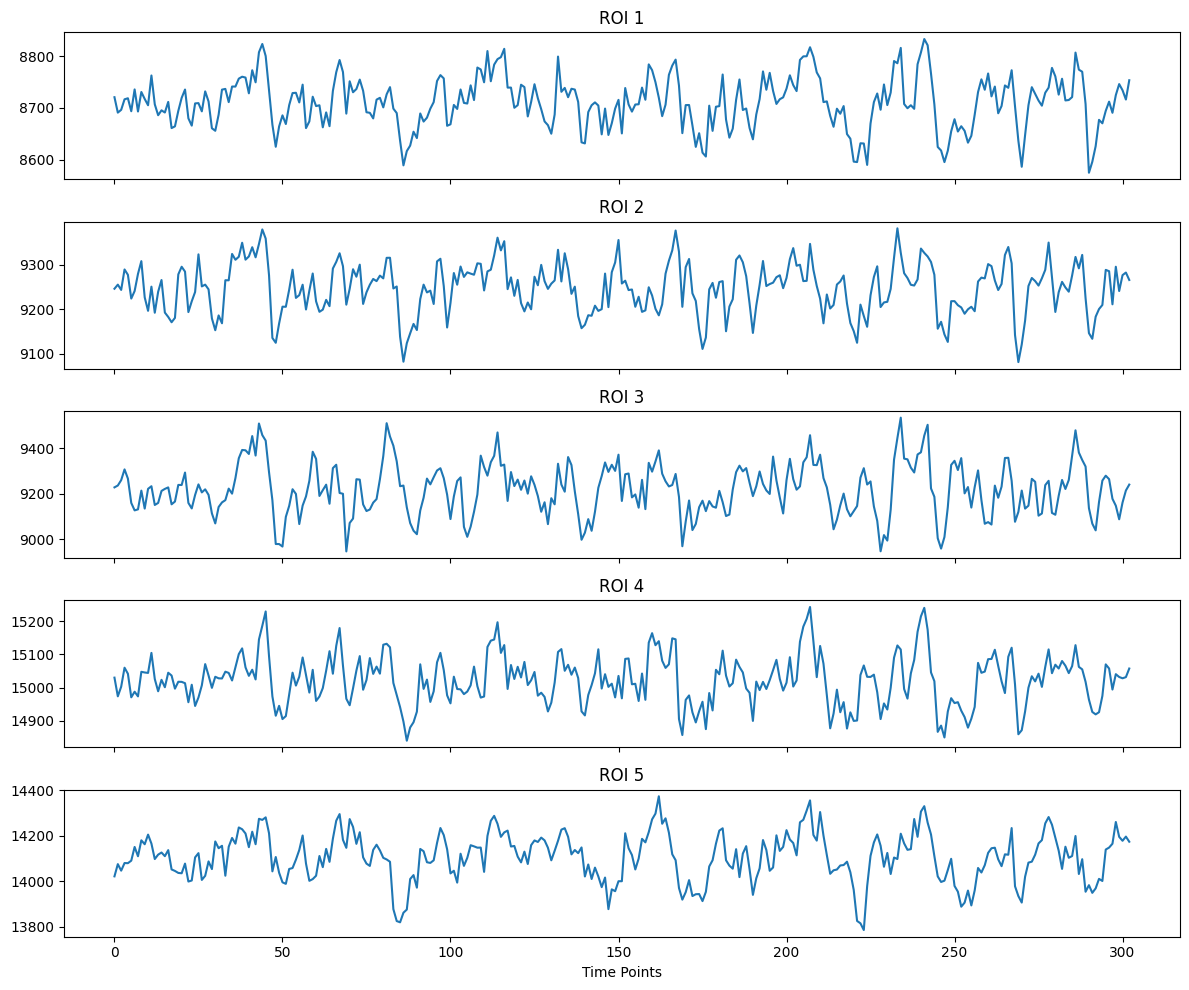

Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb4591 data shape: (770, 316)


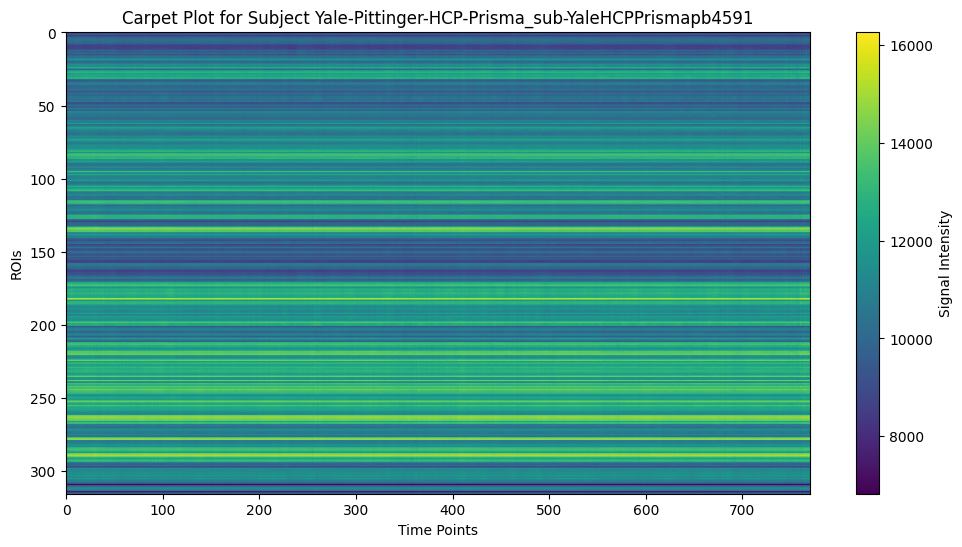

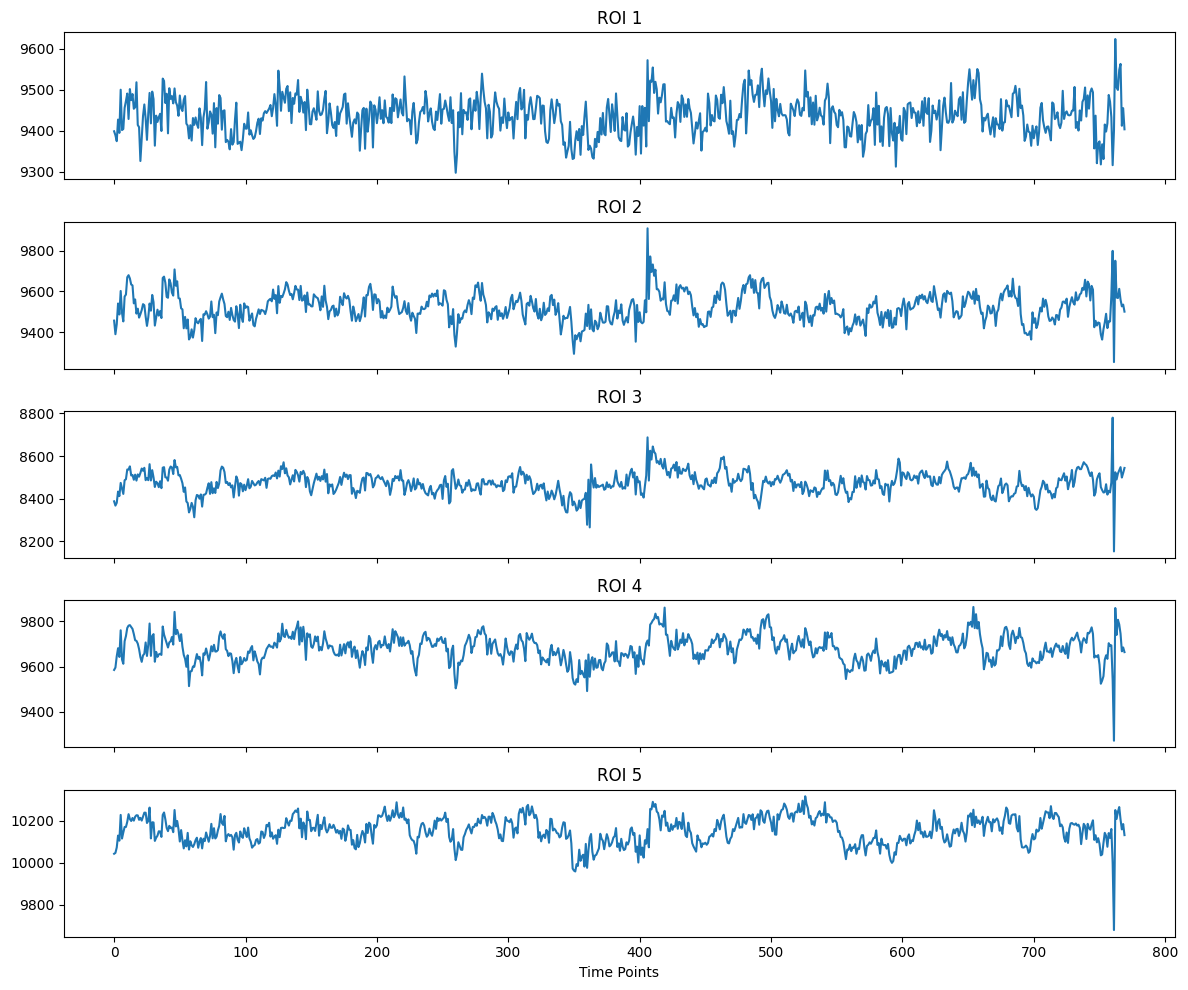

Yale-Gruner_sub-S1446WTO data shape: (150, 316)


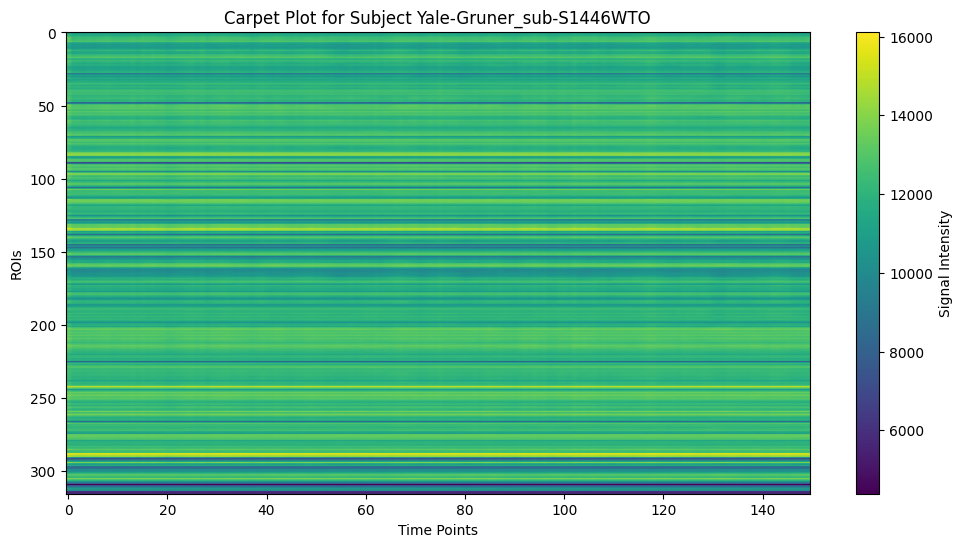

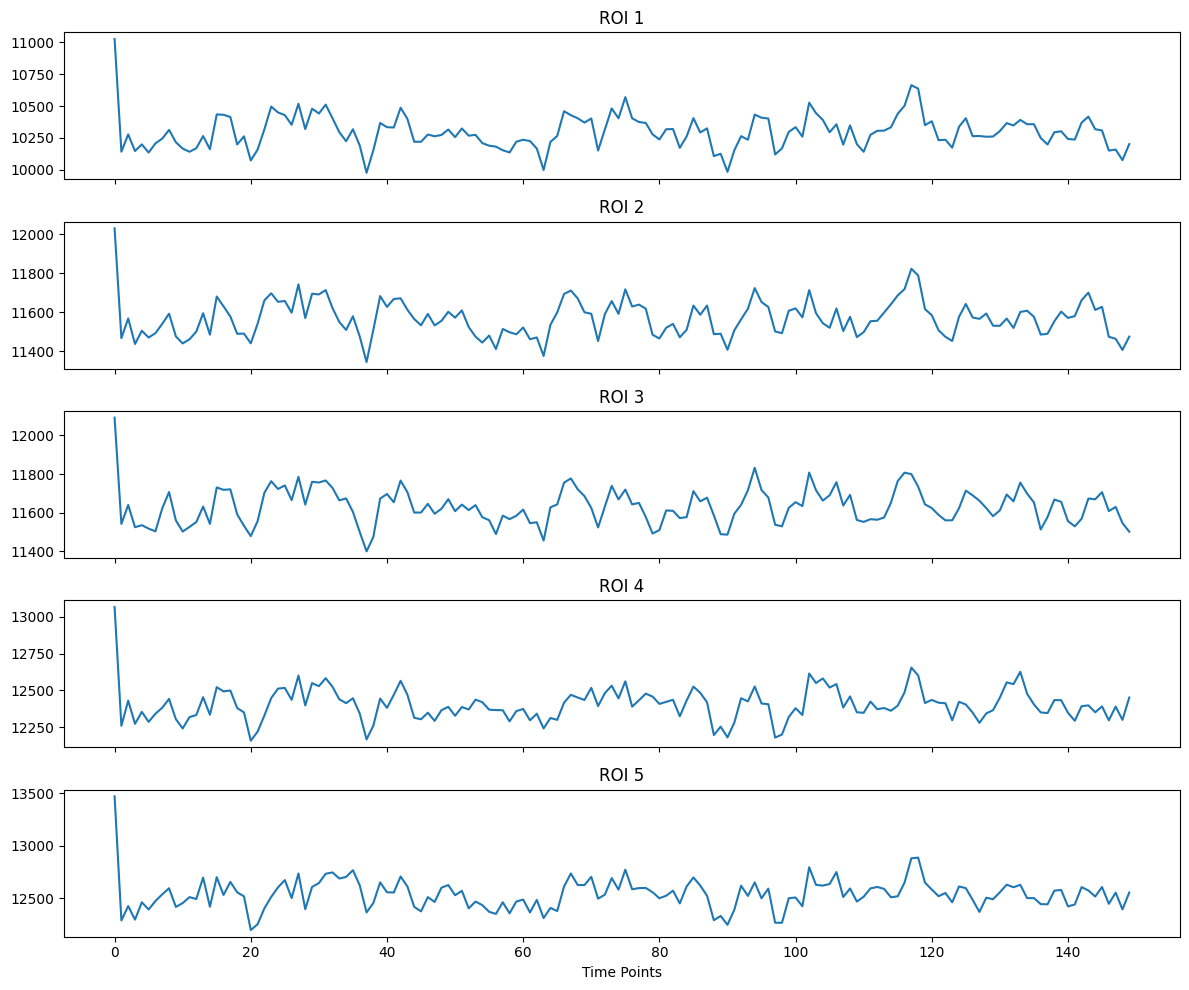

Barcelona-HCPB_sub-103 data shape: (240, 316)


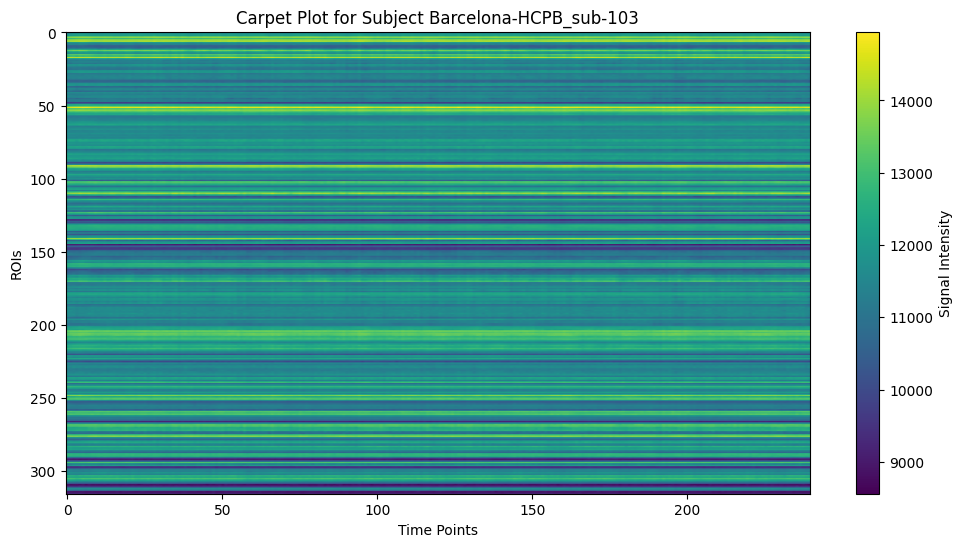

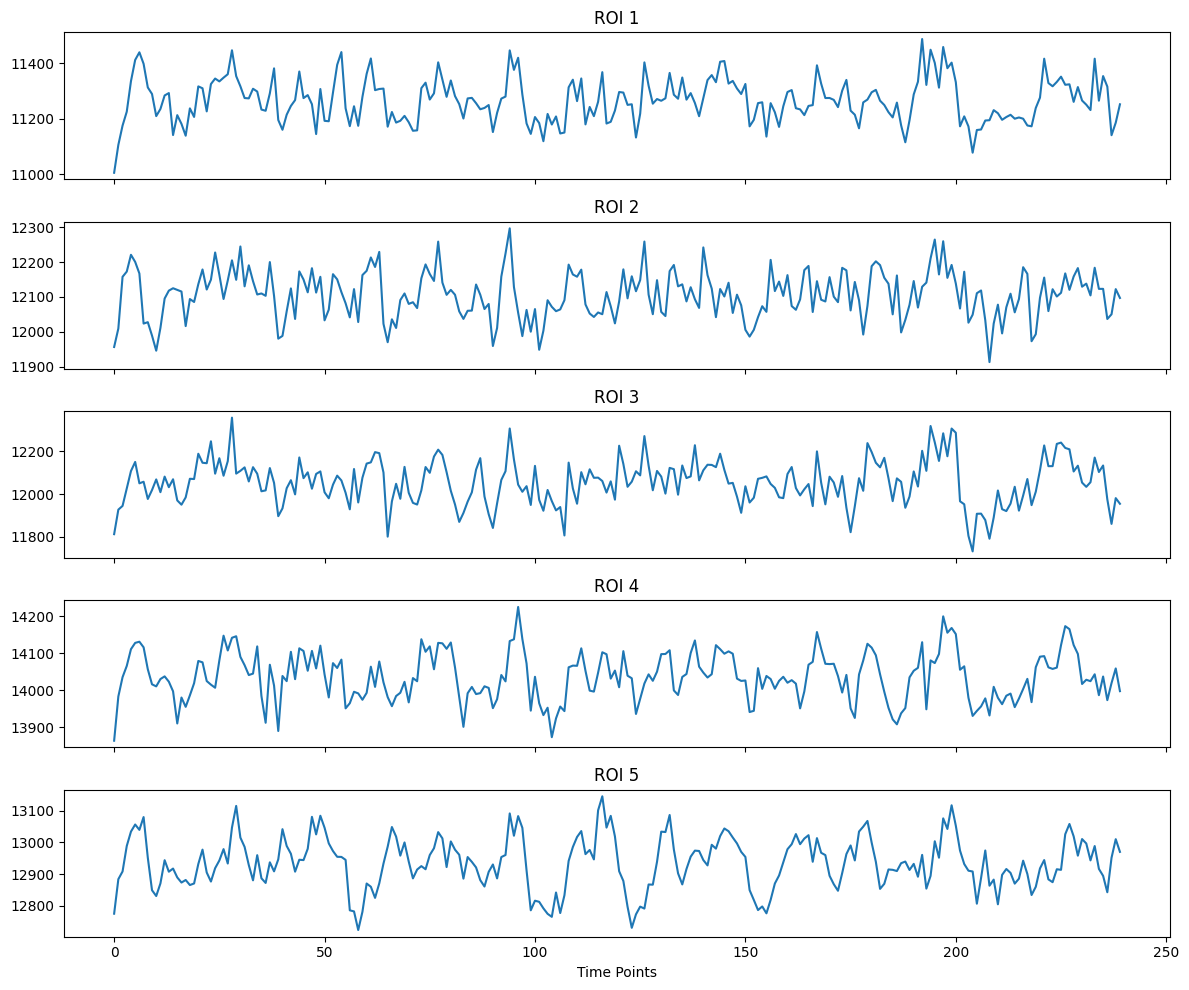

Bangalore-NIMHANS_sub-C0007 data shape: (153, 316)


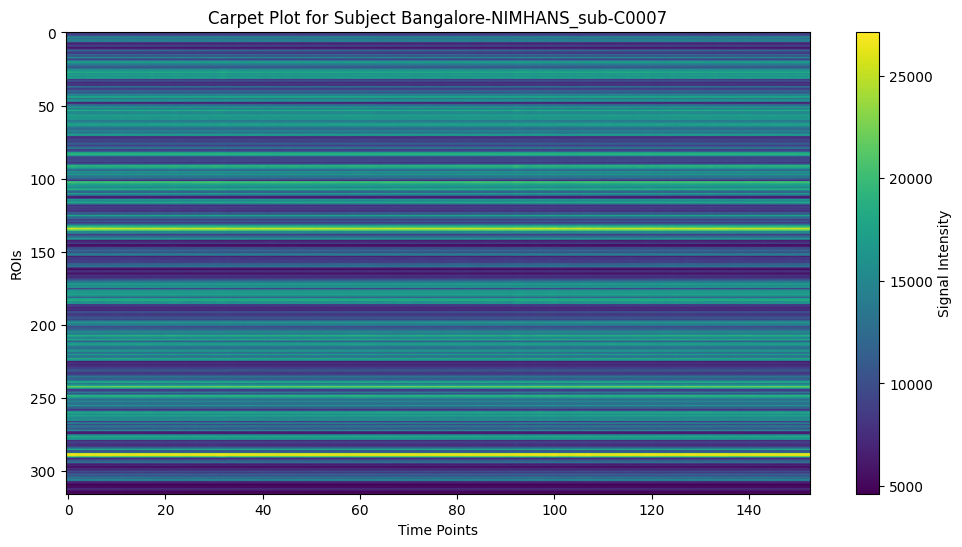

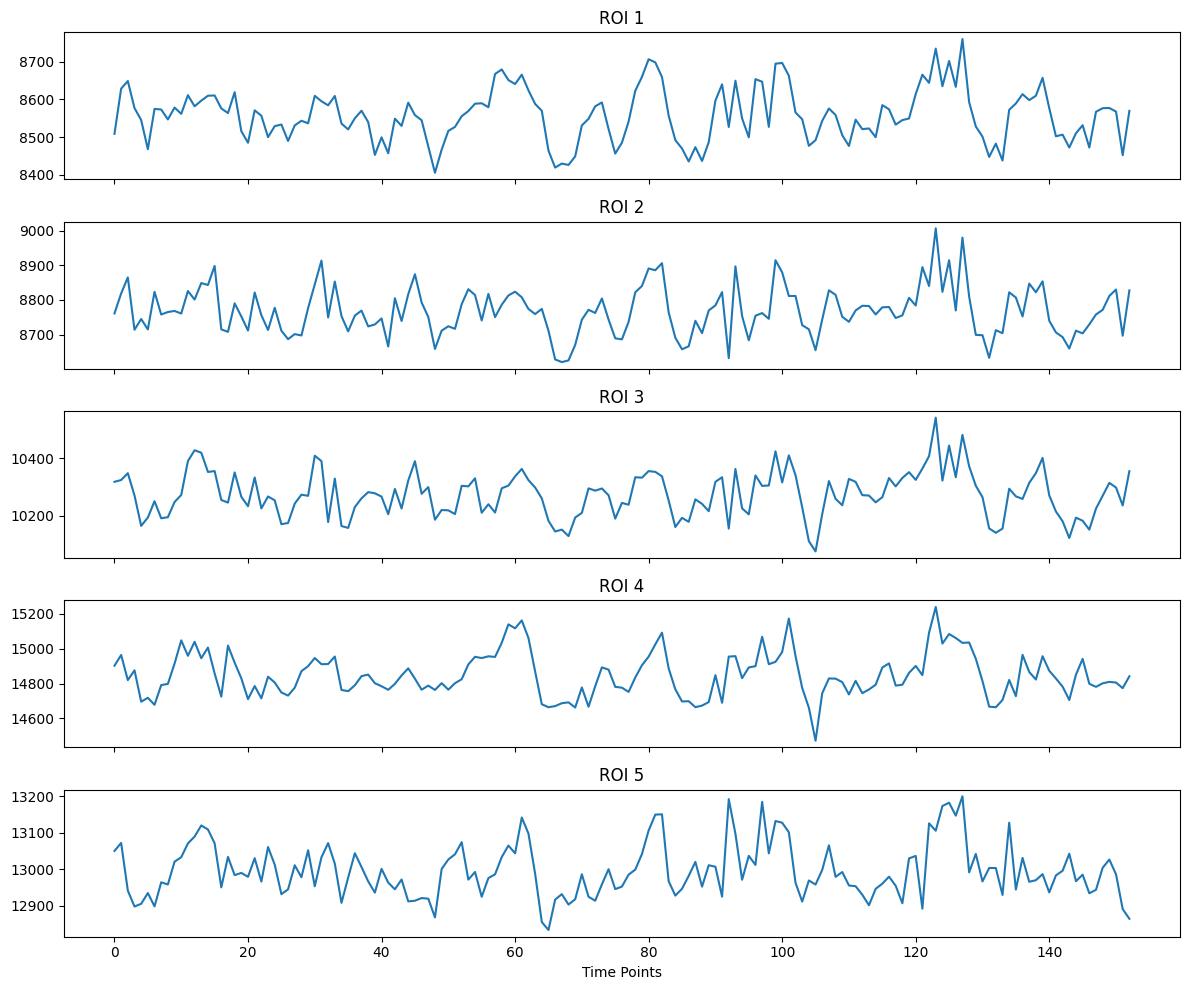

Chiba-CHBC_sub-HCC023 data shape: (196, 316)


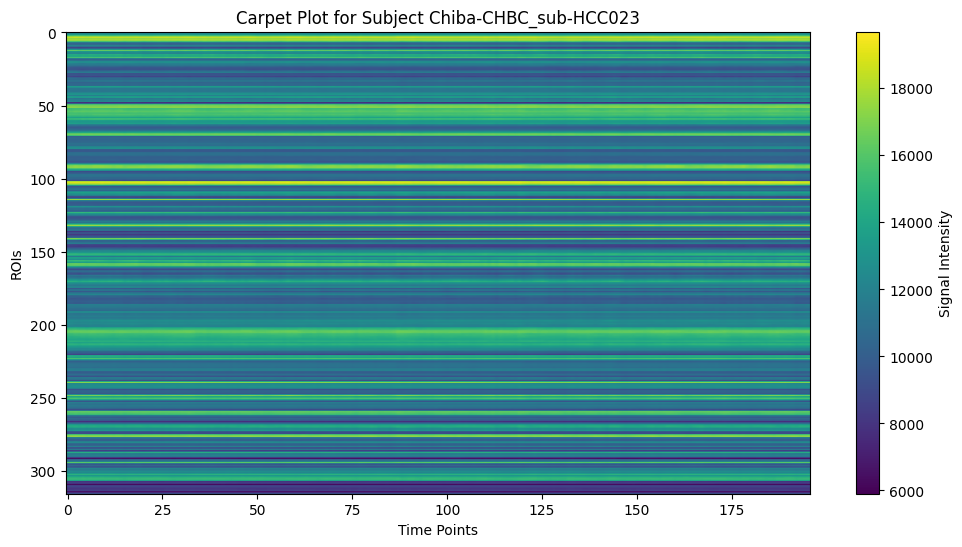

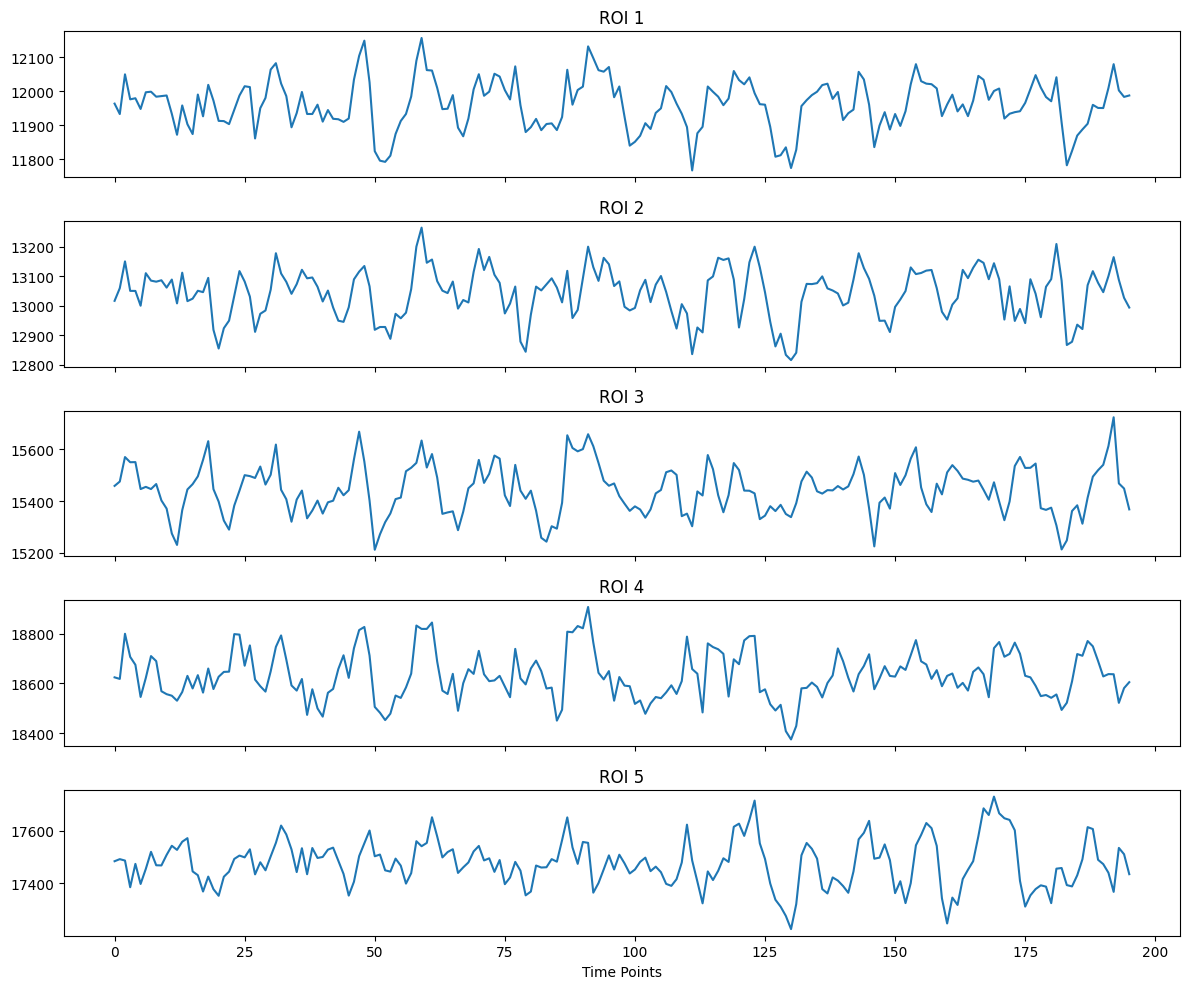

Bangalore-NIMHANS_sub-C0204 data shape: (303, 316)


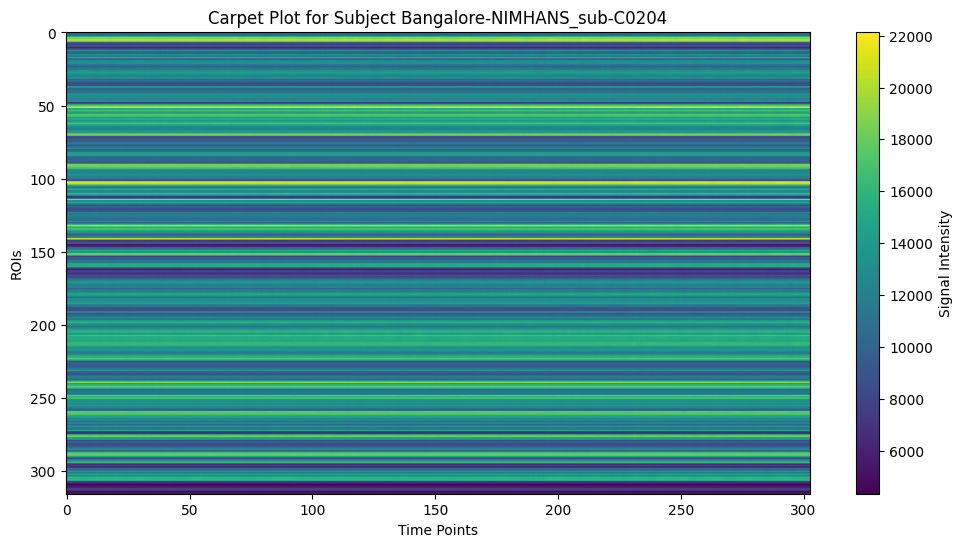

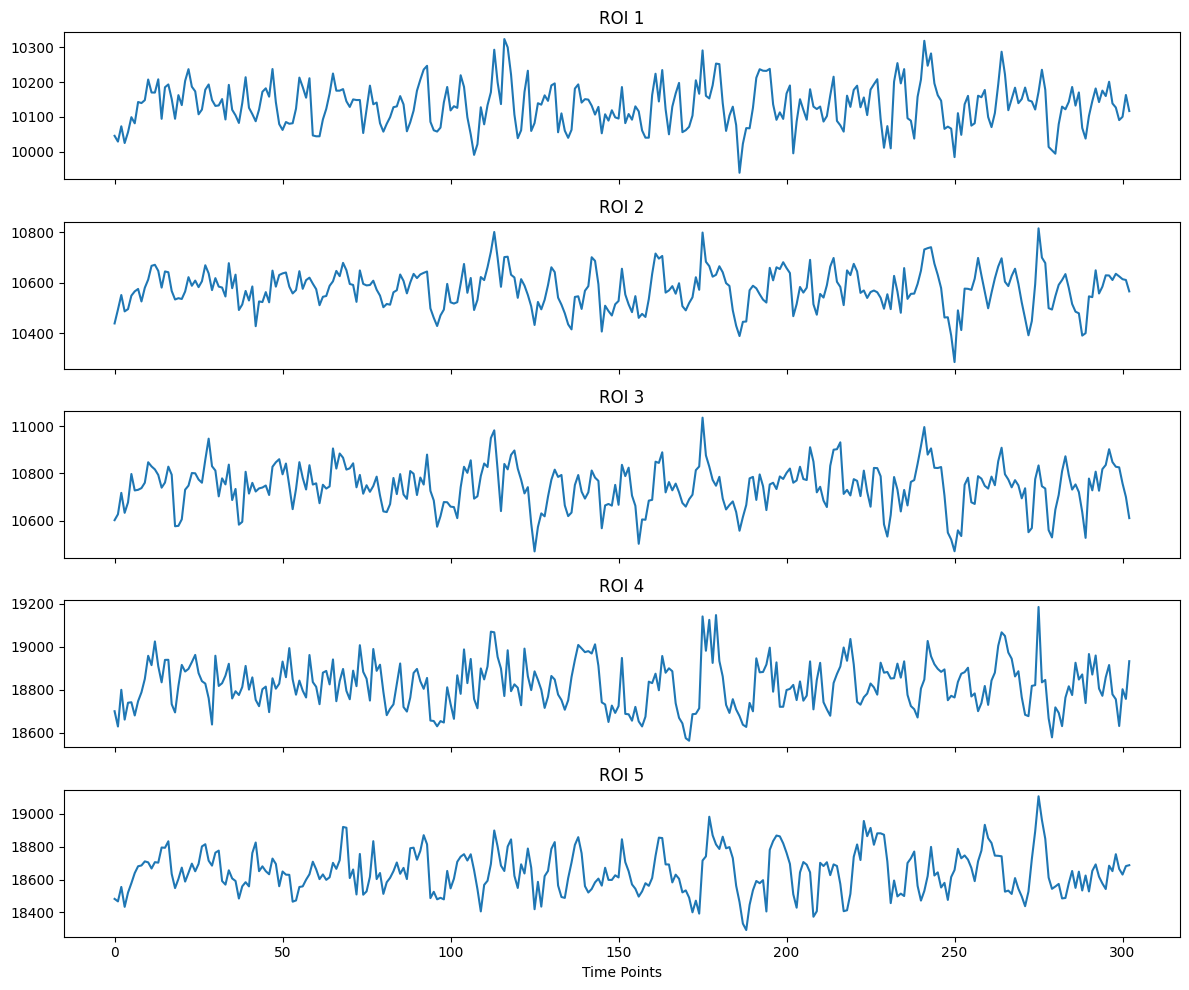

Bangalore-NIMHANS_sub-C0110 data shape: (153, 316)


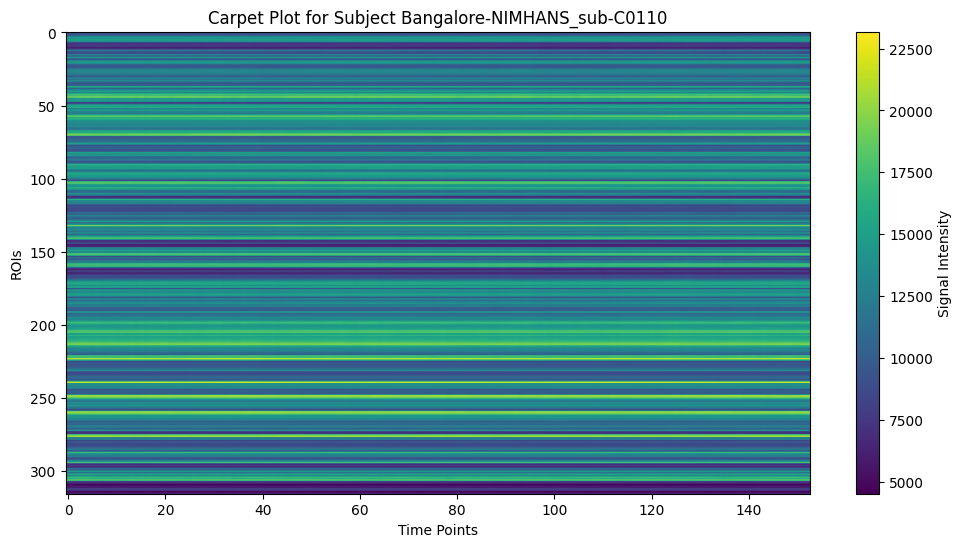

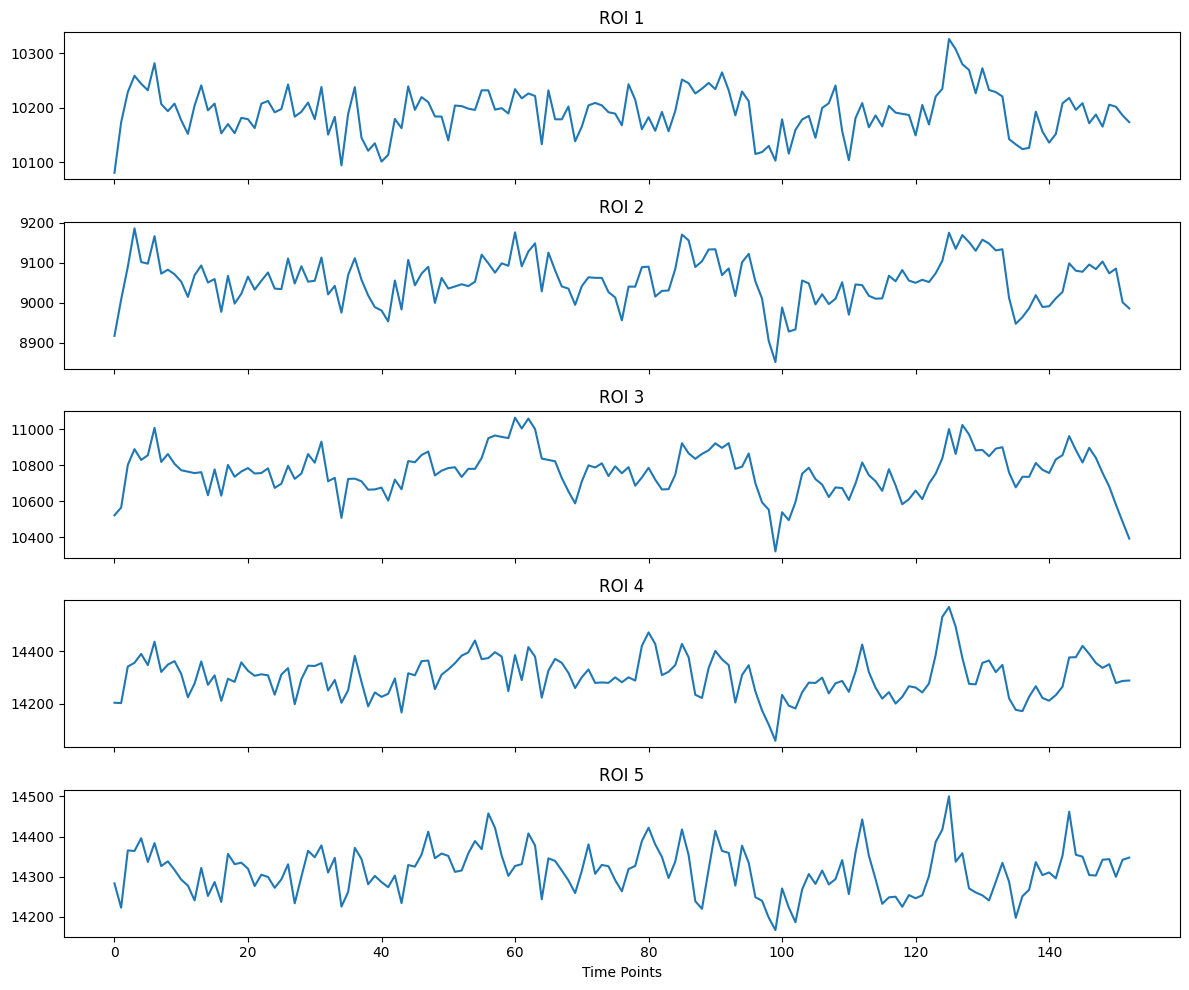

UCLA_sub-AOCD050 data shape: (208, 316)


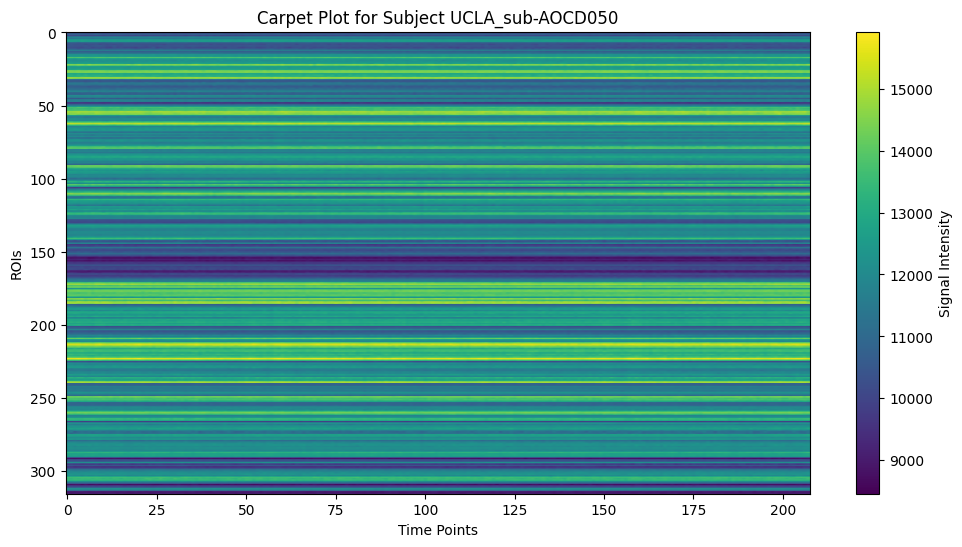

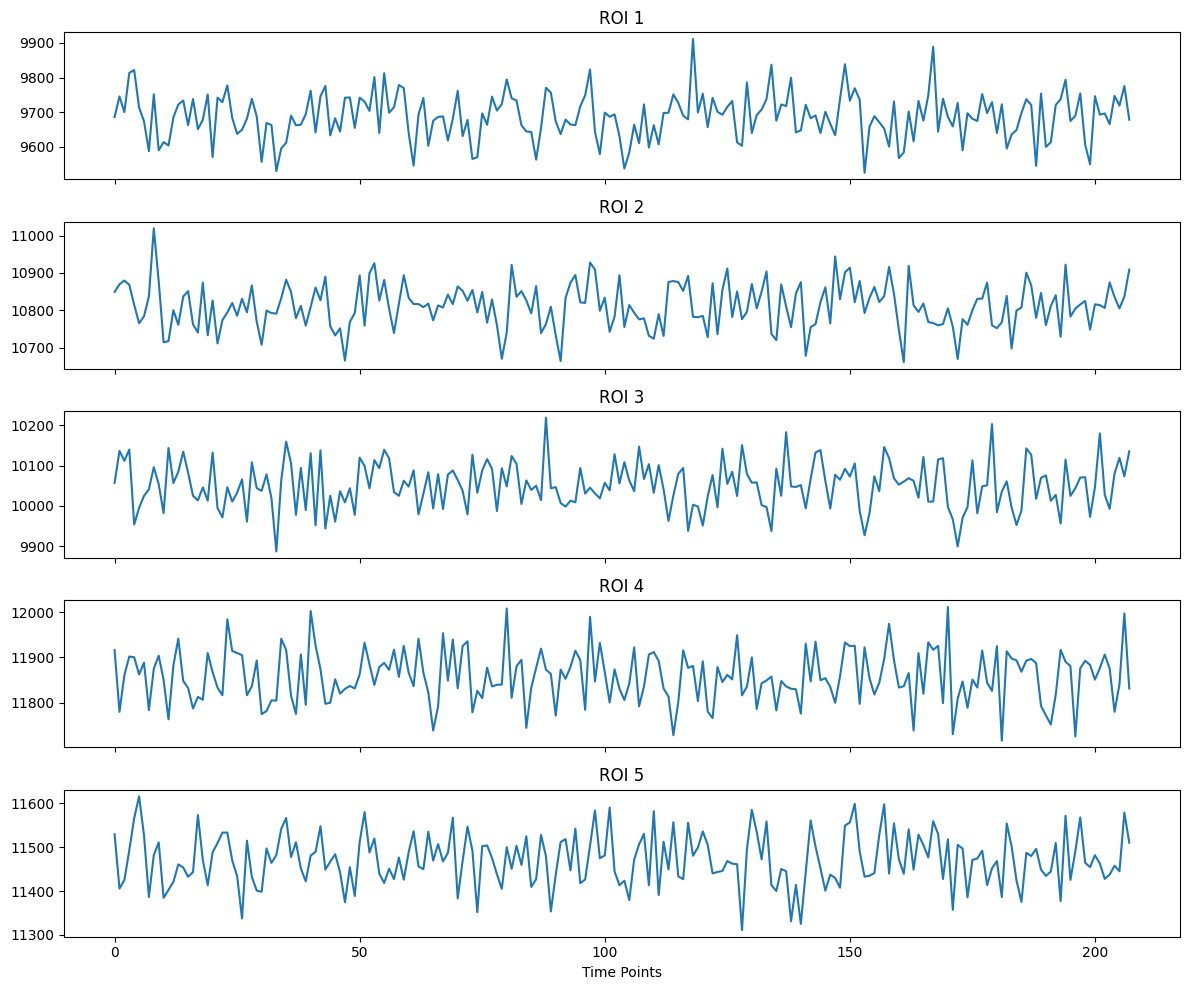

Chiba-CHBSRPB_sub-OCD153 data shape: (239, 316)


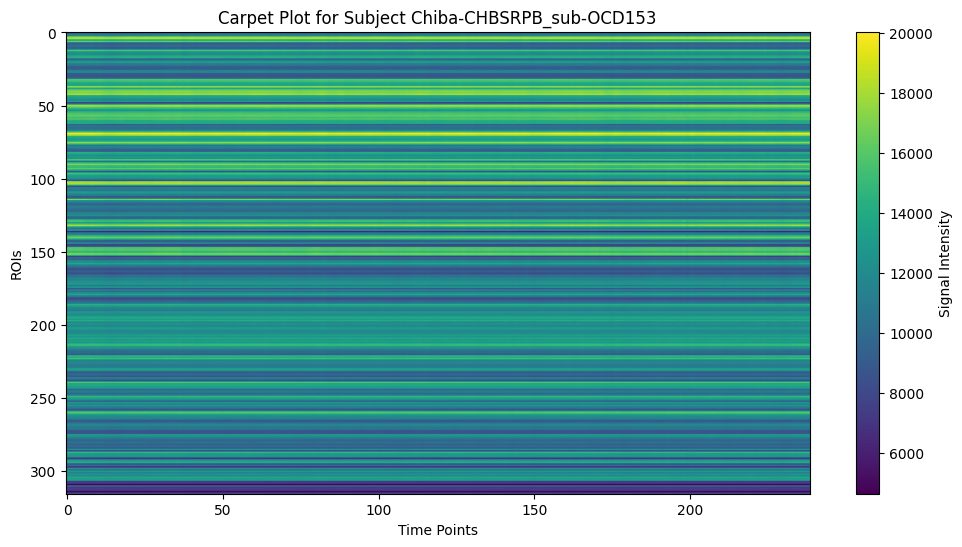

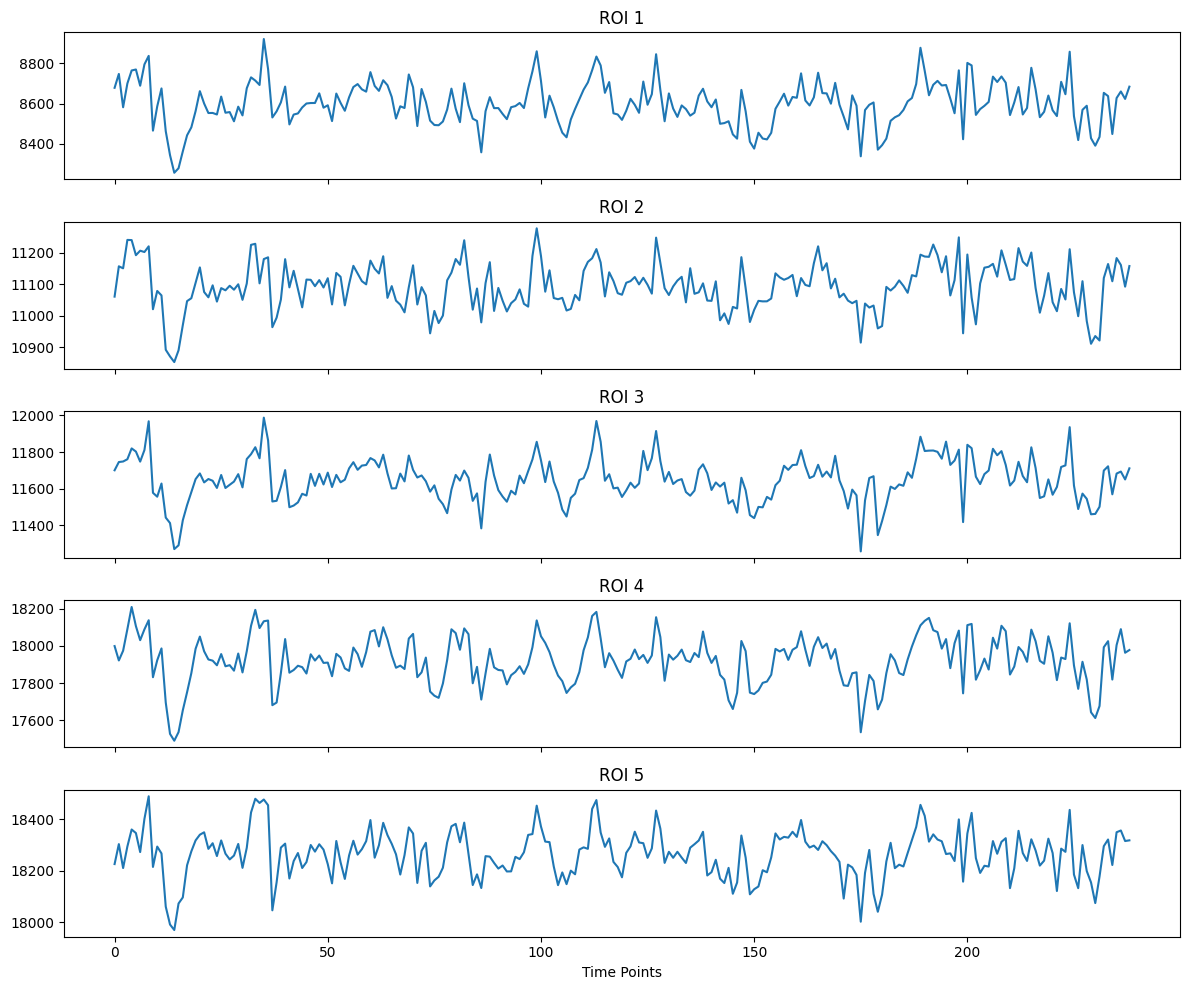

Dresden_sub-GEROME3071 data shape: (840, 316)


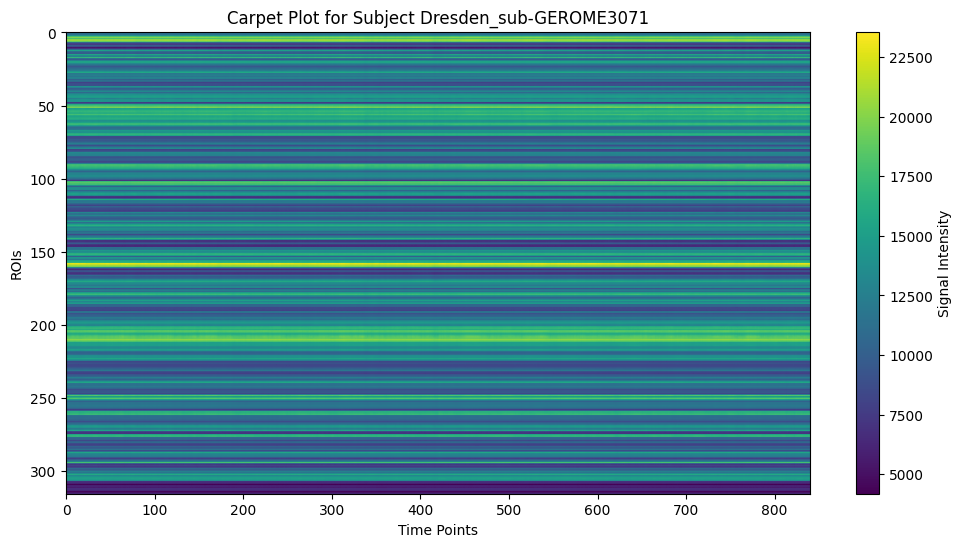

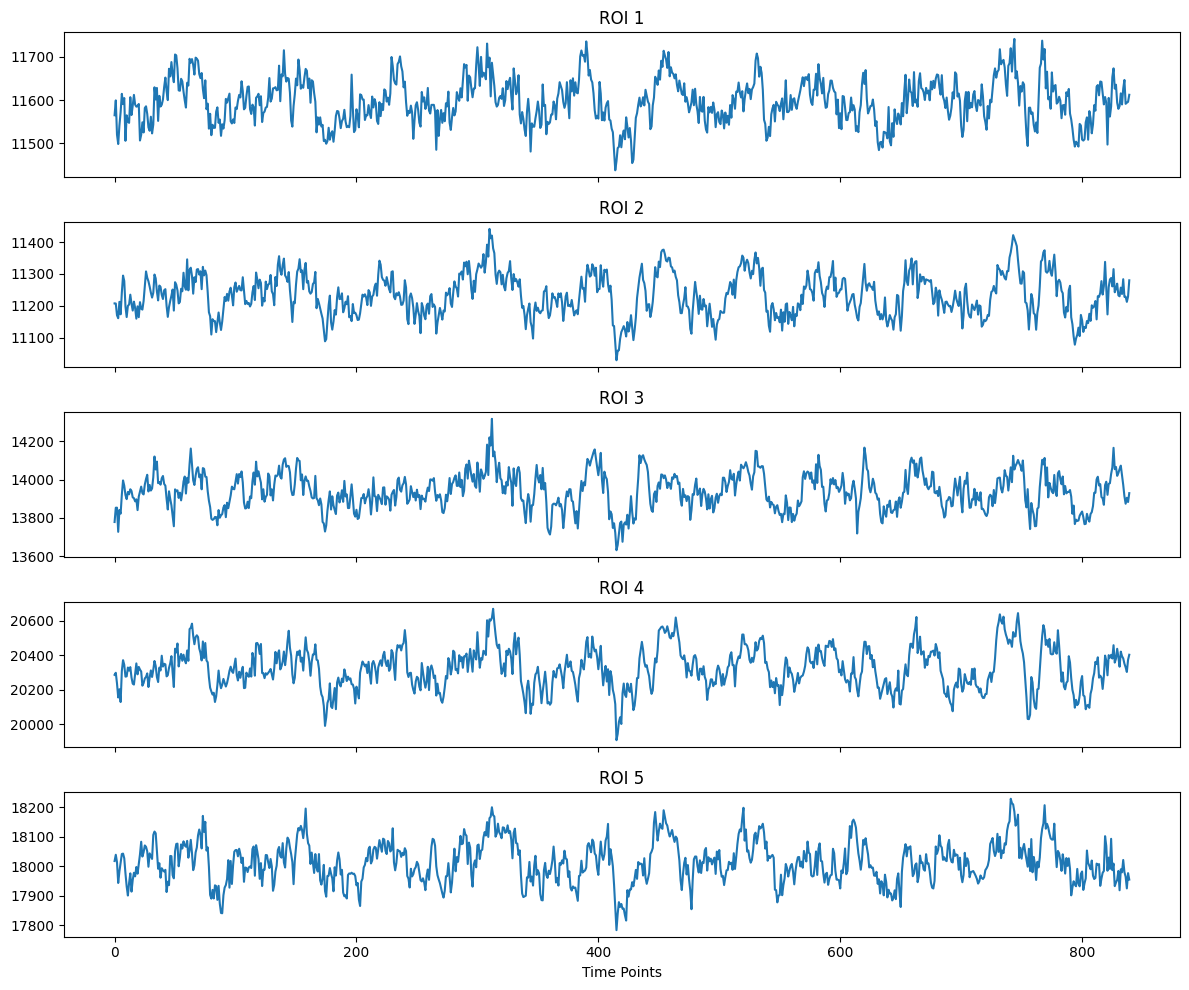

Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb3546 data shape: (770, 316)


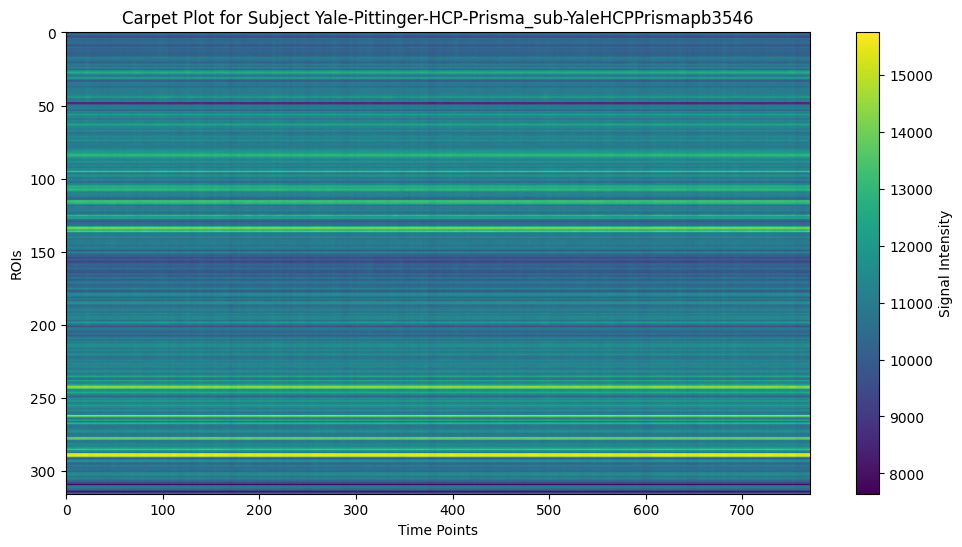

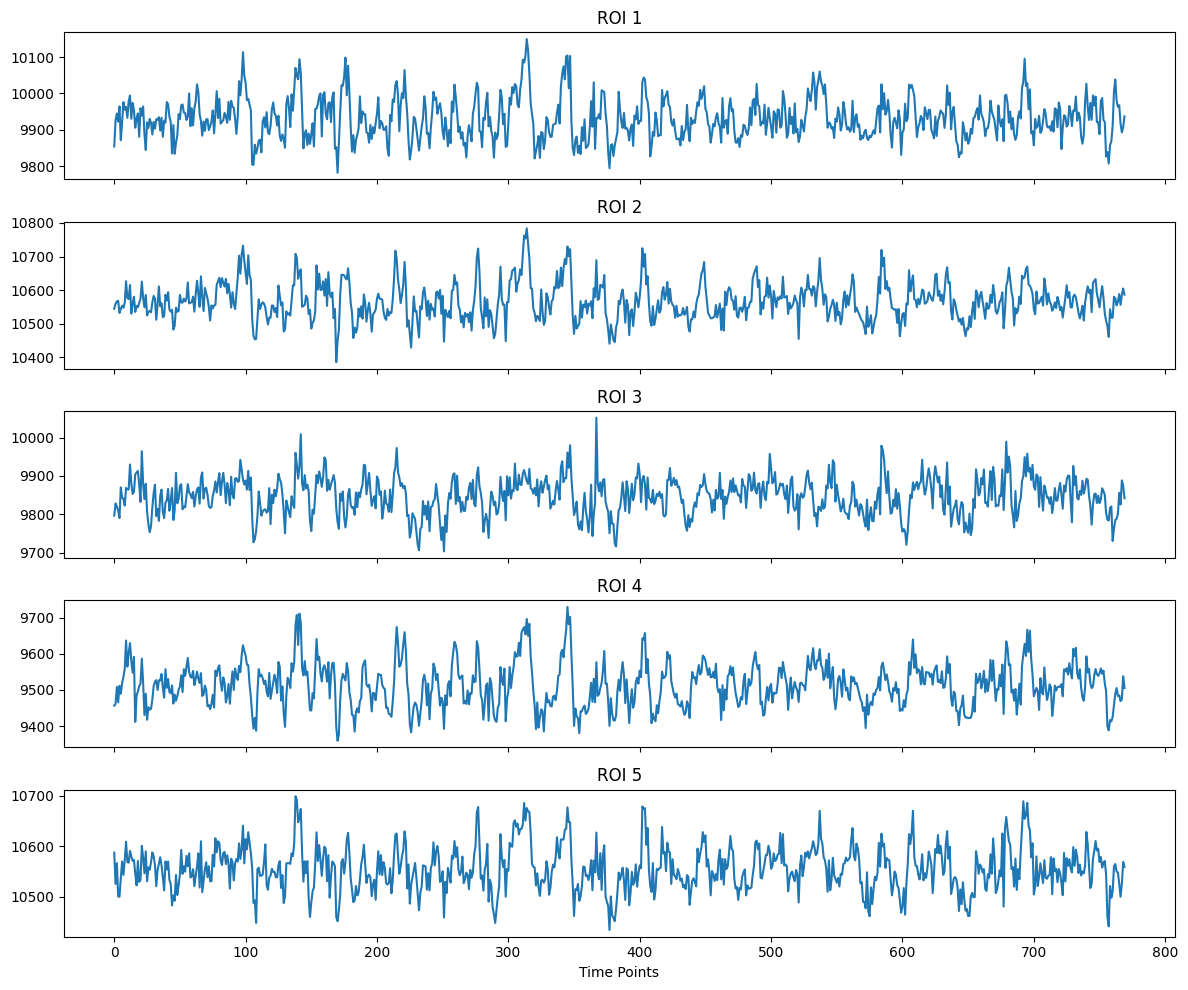

Yale-Gruner_sub-S4022KLL data shape: (150, 316)


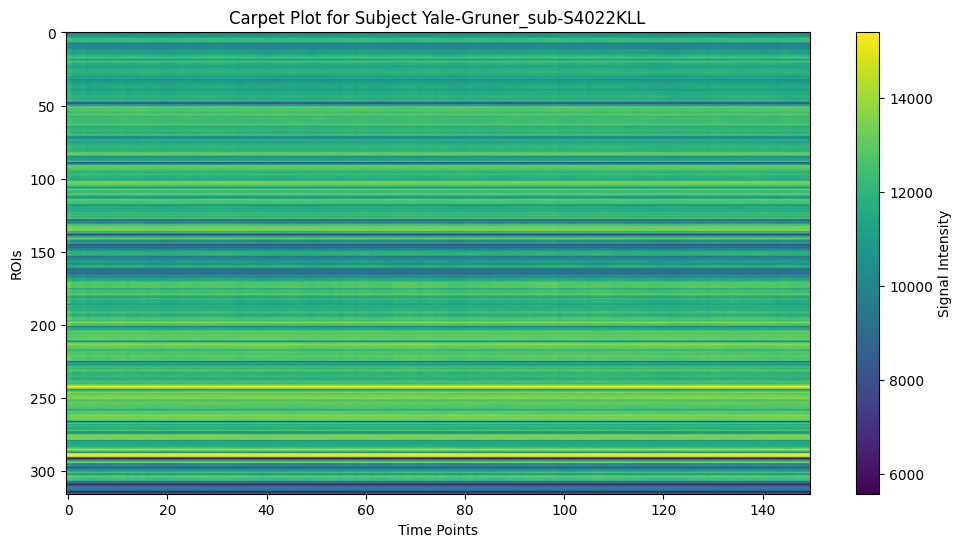

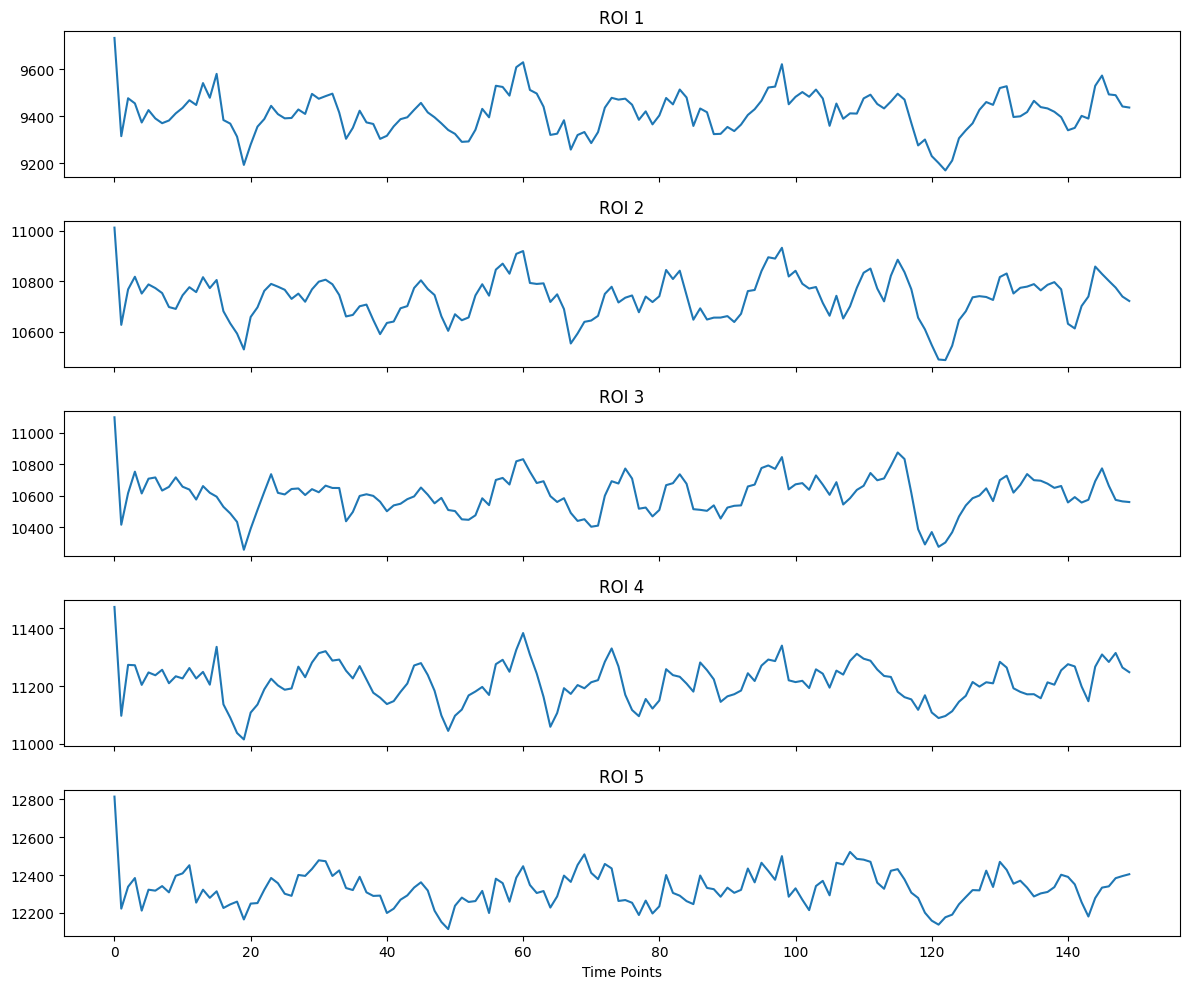

Seoul-SNU_sub-NOR79KSY data shape: (112, 316)


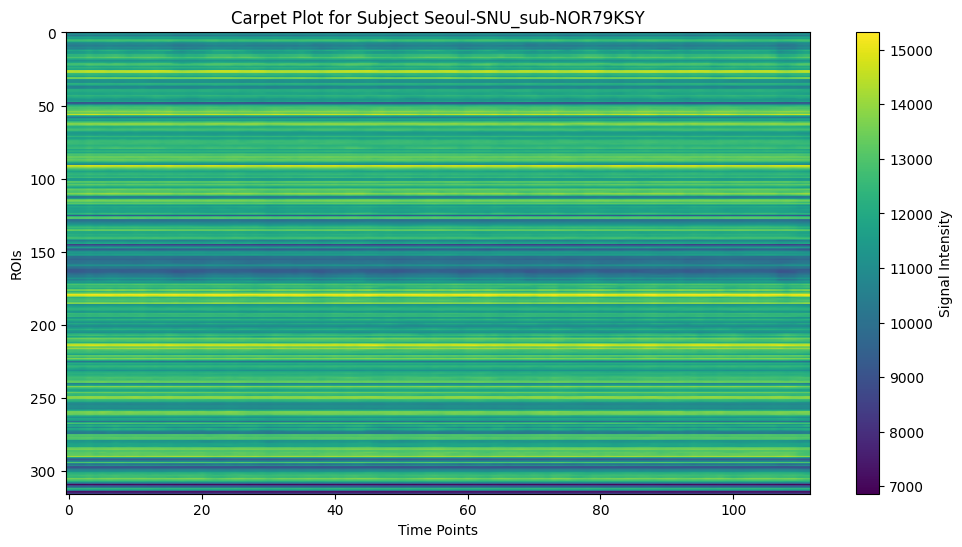

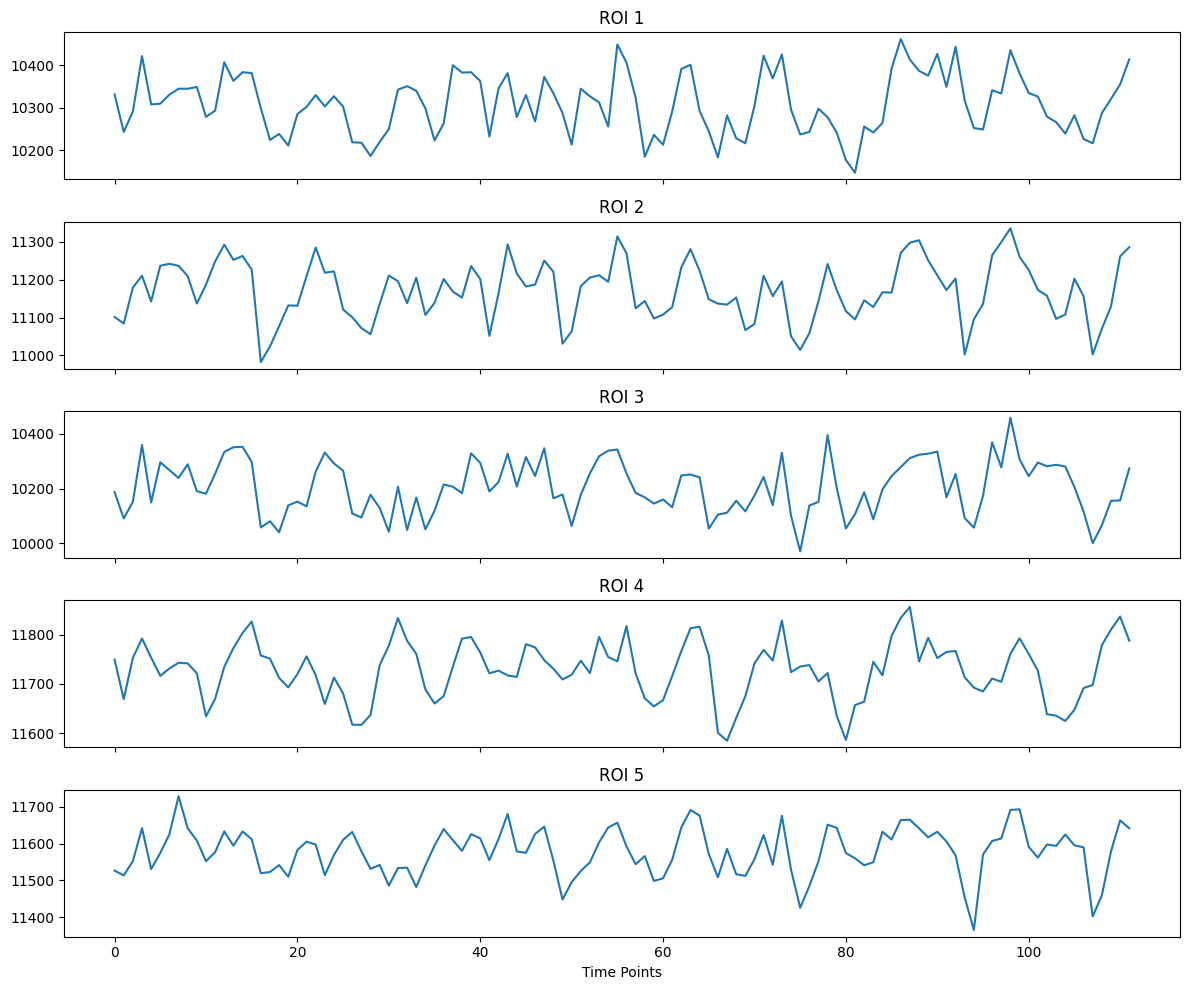

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

def inspect_subject(subject_id, data_dir='/pscratch/sd/p/pakmasha/MBBN_data'):
    subject_file = os.path.join(data_dir, subject_id, f"{subject_id}.npy")
    if not os.path.exists(subject_file):
        print(f"File for subject {subject_id} not found.")
        return

    # Load the subject's time-series data (shape: n_timepoints x n_ROIs)
    data = np.load(subject_file)
    print(f"{subject_id} data shape: {data.shape}")
    
    # Create the carpet plot by transposing the data so that ROIs are on the y-axis.
    plt.figure(figsize=(12, 6))
    plt.imshow(data.T, aspect='auto', cmap='viridis')
    plt.colorbar(label='Signal Intensity')
    plt.xlabel('Time Points')
    plt.ylabel('ROIs')
    plt.title(f'Carpet Plot for Subject {subject_id}')
    plt.show()
    
    # Plot individual time-series for the first 5 ROIs
    fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
    for i in range(min(5, data.shape[1])):
        axs[i].plot(data[:, i])
        axs[i].set_title(f'ROI {i+1}')
    plt.xlabel('Time Points')
    plt.tight_layout()
    plt.show()

# Updated list of outlier subjects based on your quality metrics
outlier_subjects = [
    'Chiba-CHB_sub-MADHC010',
    'Bangalore-NIMHANS_sub-C0198',
    'Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb4591',
    'Yale-Gruner_sub-S1446WTO',
    'Barcelona-HCPB_sub-103',
    'Bangalore-NIMHANS_sub-C0007',
    'Chiba-CHBC_sub-HCC023',
    'Bangalore-NIMHANS_sub-C0204',
    'Bangalore-NIMHANS_sub-C0110',
    'UCLA_sub-AOCD050',
    'Chiba-CHBSRPB_sub-OCD153',
    'Dresden_sub-GEROME3071',
    'Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb3546',
    'Yale-Gruner_sub-S4022KLL',
    'Seoul-SNU_sub-NOR79KSY'
]

# Inspect each outlier subject's time series
for subject in outlier_subjects:
    inspect_subject(subject)
